# Linear Regression

In [57]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler

In [58]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

In [59]:
# reading through the data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
print(df.sort_values('charges').head(3))
print(df.sort_values('charges').tail(3))

      age   sex    bmi  children smoker     region    charges
940    18  male  23.21         0     no  southeast  1121.8739
808    18  male  30.14         0     no  southeast  1131.5066
1244   18  male  33.33         0     no  southeast  1135.9407
      age     sex     bmi  children smoker     region      charges
1230   52    male  34.485         3    yes  northwest  60021.39897
1300   45    male  30.360         0    yes  southeast  62592.87309
543    54  female  47.410         0    yes  southeast  63770.42801


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [62]:
df.drop_duplicates(inplace=True)


In [63]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [64]:
# detecting unique variables
unique_var = df.nunique()==1

if any(unique_var): 
    for col in unique_var.index[unique_var] : print(f"The variable {i} content only one category.")
else: print(f"There's no variable with only one category.")

aux = df.nunique()

print(f''' 
      Categories:
        {aux}
      ''')

There's no variable with only one category.
 
      Categories:
        age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64
      


In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


Text(0, 0.5, 'count')

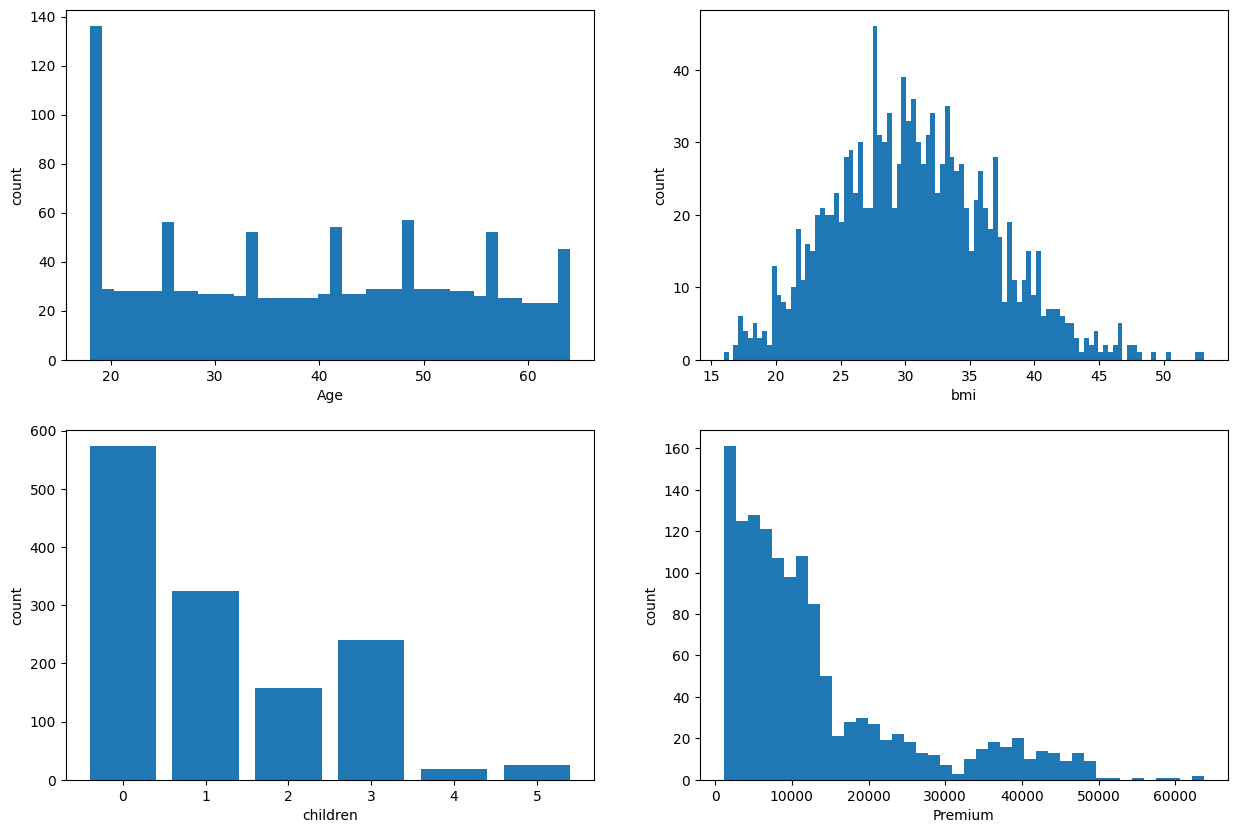

In [66]:
# vizualizating numbers
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

ax1.hist(df['age'], bins=40)
ax1.set_xlabel('Age')
ax1.set_ylabel('count')

ax2.hist(df['bmi'], bins=100)
ax2.set_xlabel('bmi')
ax2.set_ylabel('count')

xtemp = df['children'].unique()
ytemp = df.groupby('children')['children'].count()
ax3.bar(x=xtemp, height=ytemp)
ax3.set_xlabel('children')
ax3.set_ylabel('count')

ax4.hist(df['charges'], bins=40)
ax4.set_xlabel('Premium')
ax4.set_ylabel('count')

In [67]:
# let's divide the dataset
X = df.drop('charges',axis=1)
y = df['charges']

X_train, X_test = tts(X, test_size=0.2, random_state=100)

# y_train & y_test formed by indexes of X_train & X_test
y_train = y.loc[X_train.index]
y_test = y.loc[X_test.index]

In [68]:
X_train

,age,sex,bmi,children,smoker,region
1306,29,female,21.850,0,yes,northeast
124,47,female,33.915,3,no,northwest
589,38,female,30.690,1,no,southeast
1127,35,female,35.860,2,no,southeast
201,48,female,32.230,1,no,southeast
...,...,...,...,...,...,...
803,18,female,42.240,0,yes,southeast
53,36,male,34.430,0,yes,southeast
350,57,female,23.180,0,no,northwest
79,41,female,32.965,0,no,northwest


In [69]:
X_train['region'] = pd.factorize(X_train['region'])[0]
X_train['sex'] = pd.factorize(X_train['sex'])[0]
X_train['smoker'] = pd.factorize(X_train['smoker'])[0]
X_train

,age,sex,bmi,children,smoker,region
1306,29,0,21.850,0,0,0
124,47,0,33.915,3,1,1
589,38,0,30.690,1,1,2
1127,35,0,35.860,2,1,2
201,48,0,32.230,1,1,2
...,...,...,...,...,...,...
803,18,0,42.240,0,0,2
53,36,1,34.430,0,0,2
350,57,0,23.180,0,1,1
79,41,0,32.965,0,1,1


In [70]:
X_train['smoker'] = 1-X_train['smoker']
X_train

,age,sex,bmi,children,smoker,region
1306,29,0,21.850,0,1,0
124,47,0,33.915,3,0,1
589,38,0,30.690,1,0,2
1127,35,0,35.860,2,0,2
201,48,0,32.230,1,0,2
...,...,...,...,...,...,...
803,18,0,42.240,0,1,2
53,36,1,34.430,0,1,2
350,57,0,23.180,0,0,1
79,41,0,32.965,0,0,1


In [71]:
X_test

,age,sex,bmi,children,smoker,region
12,23,male,34.400,0,no,southwest
306,28,female,27.500,2,no,southwest
318,44,female,27.645,0,no,northwest
816,24,female,24.225,0,no,northwest
157,18,male,25.175,0,yes,northeast
...,...,...,...,...,...,...
714,24,female,22.600,0,no,southwest
1261,28,male,37.100,1,no,southwest
531,62,female,31.730,0,no,northeast
537,46,female,30.200,2,no,southwest


In [72]:
X_test['region'] = pd.factorize(X_test['region'])[0]
X_test['sex'] = pd.factorize(X_test['sex'])[0]
X_test['smoker'] = pd.factorize(X_test['smoker'])[0]
#X_test['smoker'] = 1-X_test['smoker']    # factorize here was inverted regarding the previos cell
X_test

,age,sex,bmi,children,smoker,region
12,23,0,34.400,0,0,0
306,28,1,27.500,2,0,0
318,44,1,27.645,0,0,1
816,24,1,24.225,0,0,1
157,18,0,25.175,0,1,2
...,...,...,...,...,...,...
714,24,1,22.600,0,0,0
1261,28,0,37.100,1,0,0
531,62,1,31.730,0,0,2
537,46,1,30.200,2,0,0


In [73]:
y_train.head()

1306    16115.30450
124     10115.00885
589      5976.83110
1127     5836.52040
201      8871.15170
Name: charges, dtype: float64

In [74]:
# let's scale the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [75]:
# starting the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [76]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b): {model.coef_}")

Intercept (a): 13312.148648662302
Coefficients (b): [3761.94353563  -24.20832837 2006.4995787   571.02986499 9572.65230617
 -307.87128079]


In [77]:
# predicting
y_pred = model.predict(X_test_scaled)

In [78]:
print(f"Root Mean squared error: {mean_squared_error(y_test, y_pred)**0.5}")
print(f"r2 Score: {r2_score(y_test, y_pred)}")

Root Mean squared error: 5821.779813902012
r2 Score: 0.7499797183146553


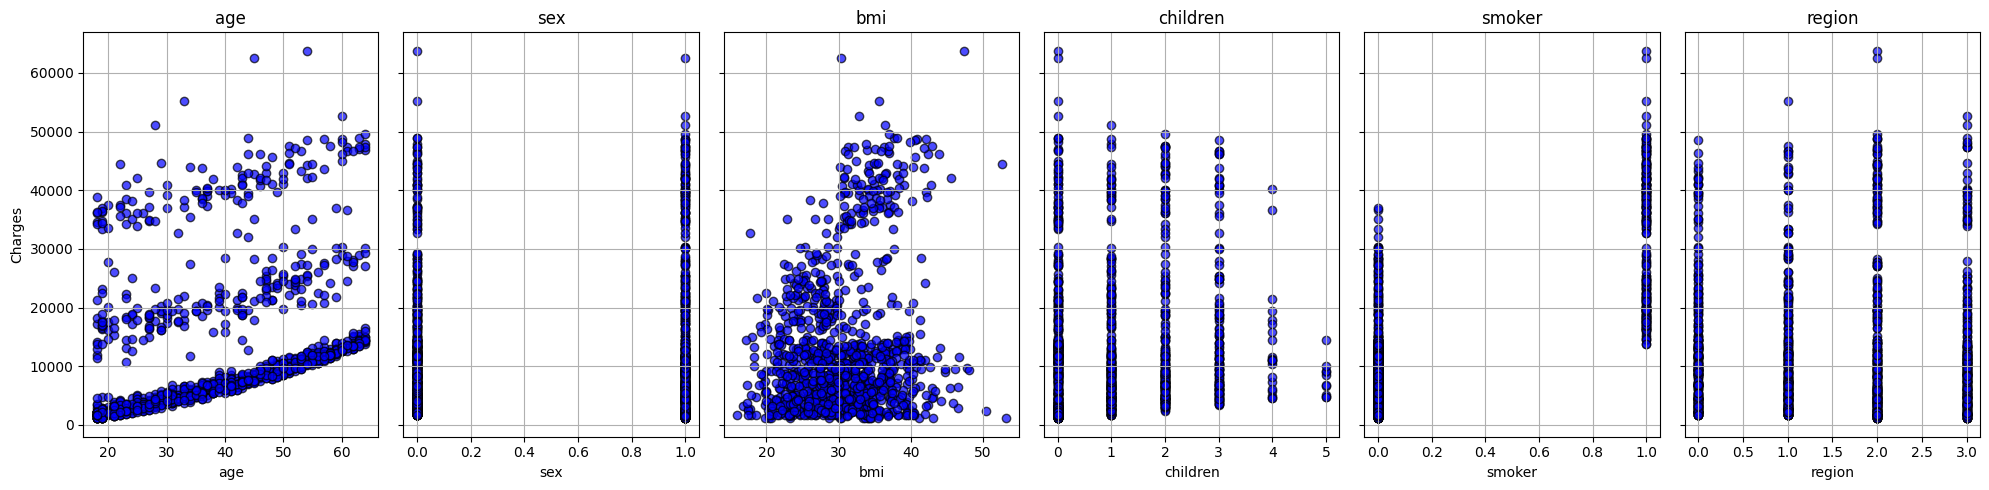

In [ ]:
# just to vizualize a little what we have
# subpltos
num_features = len(X_train.keys())
fig, axes = plt.subplots(1, num_features, figsize=(20, 5), sharey=True)

# a chart for a variable vs pred
for i, (feature_name, feature_values) in enumerate(X_train.items()):
    axes[i].scatter(feature_values, y_train, color='blue', edgecolor='k', alpha=0.7)
    axes[i].set_title(feature_name)
    axes[i].set_xlabel(feature_name)
    if i == 0:  # to label only first axis with var pred
        axes[i].set_ylabel("Charges")
    axes[i].grid(True)

plt.tight_layout()
plt.show()


In [87]:
# predicting samples 
data_to_predict = pd.DataFrame({
    'age': [30, 45, 60],
    'sex': [0, 1, 0],  # 1: Male, 0: Female
    'bmi': [25.3, 29.1, 35.5],
    'children': [1, 2, 0],
    'smoker': [0, 1, 0],  # 0: No, 1: Yes
    'region': [1, 2, 3],  
})

# scaling data
data_to_predict_scaled = scaler.transform(data_to_predict)

# predict
predictions = model.predict(data_to_predict_scaled)
predictions = np.round(predictions,2)
data_with_predictions = data_to_predict.copy()
data_with_predictions = pd.DataFrame(data_with_predictions)
data_with_predictions['Predicted Charges'] = predictions


data_with_predictions


,age,sex,bmi,children,smoker,region,Predicted Charges
0,30,0,25.3,1,0,1,4356.11
1,45,1,29.1,2,1,2,33331.89
2,60,0,35.5,0,0,3,14685.87
